In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 5, 3, 0, 5, 10, 1, 2]])
X

array([[ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
       [ 1,  1,  2,  5,  3,  0,  5, 10,  1,  2]])

In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]
y

[45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
y_pred1 = 35 * np.ones(10) + X[1]*5
y_pred2 = 40 * np.ones(10) + X[1]*7.5

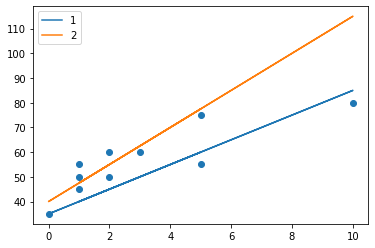

In [5]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1')
plt.plot(X[1], y_pred2, label='2')
plt.legend()
plt.show()

In [6]:
# MSE
mse_1 = np.mean((y - y_pred1)**2)
mse_2 = np.mean((y - y_pred2)**2)
mse_1, mse_2

(97.5, 188.75)

In [7]:
def calc_mae(y, y_pred):
    err = np.mean(np.abs(y - y_pred))
    return err

def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2) # <=> 1/n * np.sum((y_pred - y)**2)
    return err

In [9]:
W = np.linalg.inv(np.dot(X, X.T)) @ X @ y
W

array([45.0625,  3.8125])

In [10]:
y_pred3 = W[0] * X[0] + W[1] * X[1]
y_pred3

array([48.875 , 48.875 , 52.6875, 64.125 , 56.5   , 45.0625, 64.125 ,
       83.1875, 48.875 , 52.6875])

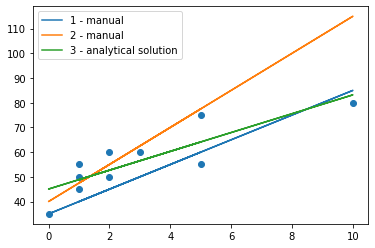

In [12]:
plt.scatter(X[1], y)
plt.plot(X[1], y_pred1, label='1 - manual')
plt.plot(X[1], y_pred2, label='2 - manual')
plt.plot(X[1], y_pred3, label='3 - analytical solution')
plt.legend()
plt.show()

In [11]:
n = 10
Q = 1/n * np.sum((y_pred3 - y)**2) # функционал ошибки, y = X*w

In [13]:
alpha = 1e-2 # величина шага
g = alpha * (1/n * 2 * np.sum(X[0] * (W[0] * X[0] - y)))

In [14]:
W[0], W[0] - g

(45.062500000000014, 45.29125000000001)

In [42]:
# 1. Подберите скорость обучения (alpha) и количество итераций.

n = X.shape[1]
alpha_array = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
errors_two = []
for alpha in alpha_array:
    W = np.array([1, 0.5])
    print(f'Number of objects = {n} \
           \nLearning rate = {alpha} \
           \nInititial weights = {W} \n\n')

    errors = [] # вектор ошибок
    for i in range(100):
        y_pred = np.dot(W, X)
        err = calc_mse(y, y_pred)
        errors.append(err)
        for k in range(len(W)):
            W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    errors_two.append(errors)

Number of objects = 10            
Learning rate = 0.1            
Inititial weights = [1.  0.5] 


Number of objects = 10            
Learning rate = 0.01            
Inititial weights = [1.  0.5] 


Number of objects = 10            
Learning rate = 0.001            
Inititial weights = [1.  0.5] 


Number of objects = 10            
Learning rate = 0.0001            
Inititial weights = [1.  0.5] 


Number of objects = 10            
Learning rate = 1e-05            
Inititial weights = [1.  0.5] 




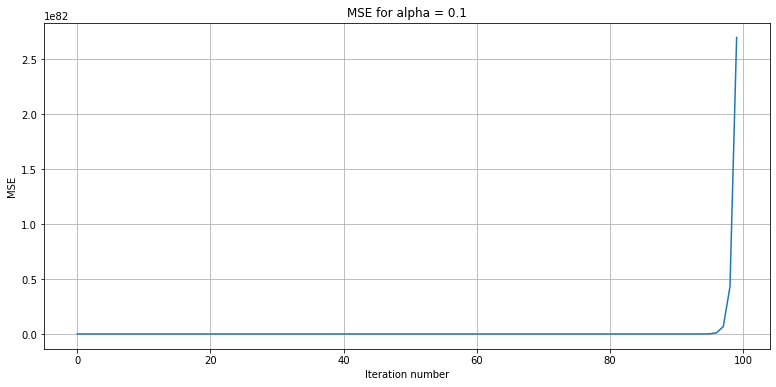

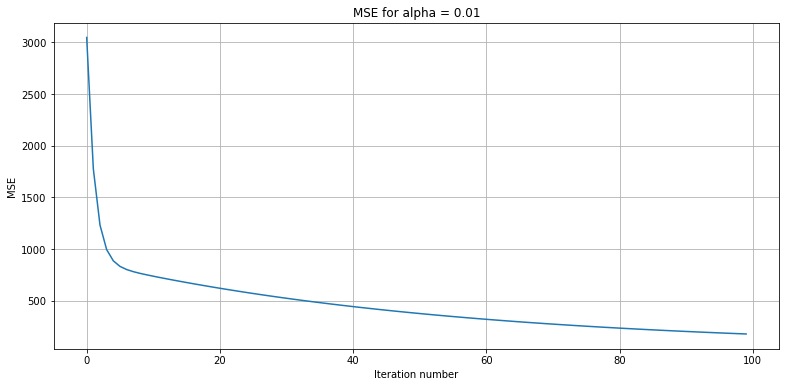

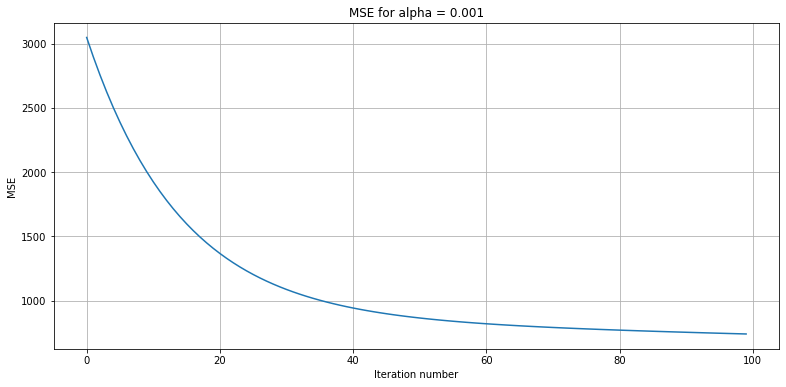

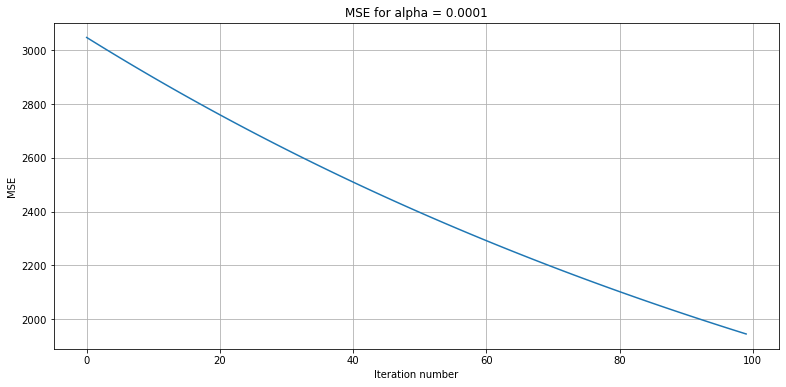

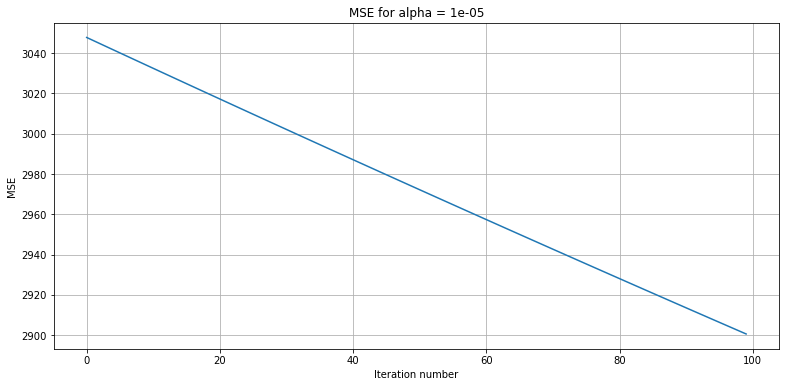

In [43]:
for i in range(len(errors_two)):
    plt.figure(figsize=(13, 6))
    plt.title('MSE for alpha = '+ str(alpha_array[i]))
    plt.xlabel('Iteration number')
    plt.ylabel('MSE')

    errors_ = errors_two[i]
    plt.plot(range(len(errors_)), errors_)
    plt.grid(True)
    # plt.legend()
    plt.show()

Анализ графиков выхода MSE на плато показывает, что при количестве итераций 100 MSE начинает сходиться при скорости обучения 0,01
Однако при таком количестве итераций MSE остается достаточно большой. Подберем количество итераций.
При маленьком количестве итераций функция начнет расходиться

In [68]:
alpha = 1e-2
W = np.array([1, 0.5])

errors = [] # вектор ошибок
for i in range(200):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

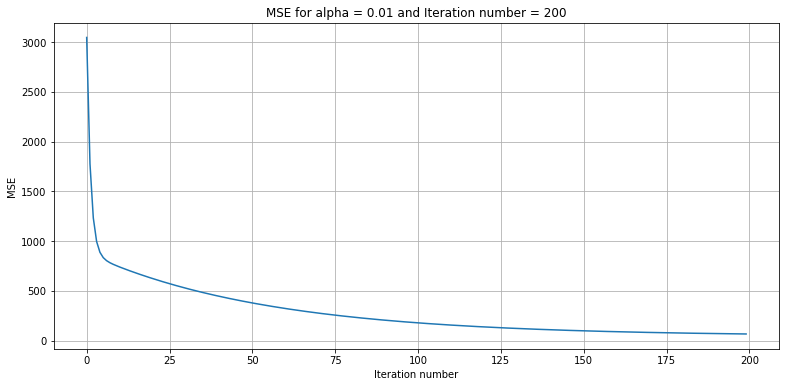

In [69]:
plt.figure(figsize=(13, 6))
plt.title('MSE for alpha = 0.01 and Iteration number = 200')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), errors)
plt.grid(True)
plt.show()

Однако при таком количестве итераций MSE ведет себя лучше, но остается достаточно большой. Увеличим количество итераций

In [75]:
W = np.array([1, 0.5])

errors = [] # вектор ошибок
for i in range(500):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

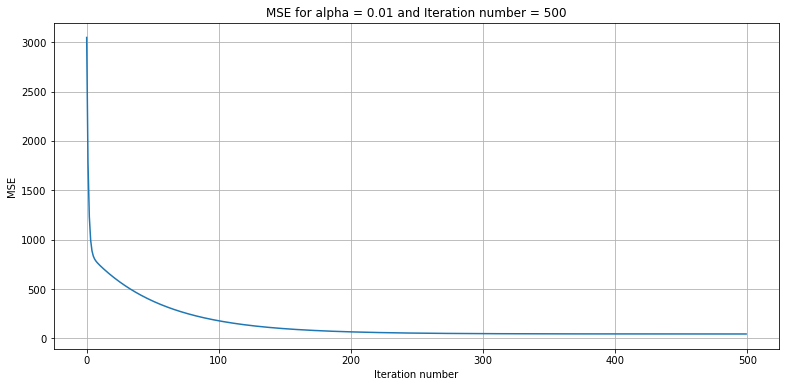

In [76]:
plt.figure(figsize=(13, 6))
plt.title('MSE for alpha = 0.01 and Iteration number = 500')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), errors)
plt.grid(True)
plt.show()

In [72]:
W = np.array([1, 0.5])

errors = [] # вектор ошибок
for i in range(5000):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

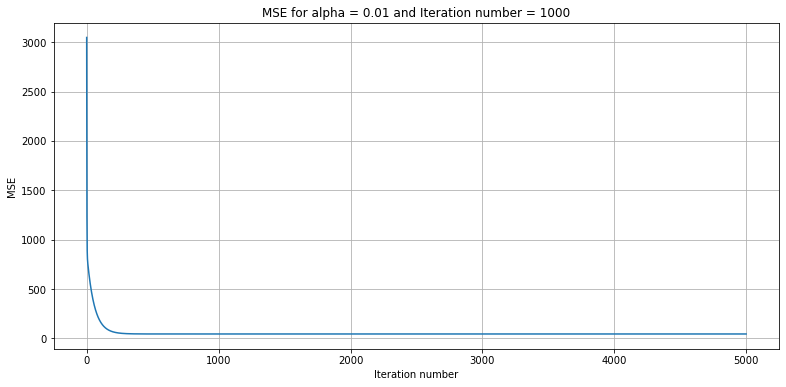

In [73]:
plt.figure(figsize=(13, 6))
plt.title('MSE for alpha = 0.01 and Iteration number = 1000')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), errors)
plt.grid(True)
plt.show()

Увеличение числа итераций после 300 не вносит сколь-нибудь существенного вклада в улучшение показателей MSE.
Построим для 300

In [77]:
W = np.array([1, 0.5])

errors = [] # вектор ошибок
for i in range(300):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    errors.append(err)
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))

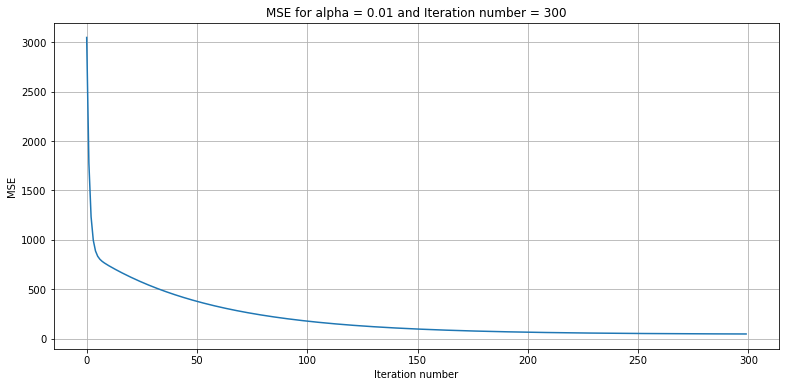

In [78]:
plt.figure(figsize=(13, 6))
plt.title('MSE for alpha = 0.01 and Iteration number = 300')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

plt.plot(range(len(errors)), errors)
plt.grid(True)
plt.show()

Таким образом, представляется, что шаг обучения 0.01 и число итераций 300 - самые удачные параметры градиентного спуска

In [88]:
# 2. Найти ошибку
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    #for k in range(W.shape[0]):
    #     W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    W -= alpha * (1/n * 2 * np.sum(X[0] * (y_pred - y)))
#   уменьшаем вес каждый раз на одну и ту же величину. Х - двумерный массив, для избавления от весов, 
# как мне кажется, надо указать строку, которую берем
          
    W_pred = W
    
    if i % 10 == 0:
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

Iteration #0: W_new = [2.08 1.58], MSE = 3047.75
Iteration #10: W_new = [9.1048954 8.6048954], MSE = 743.72
Iteration #20: W_new = [12.15642885 11.65642885], MSE = 614.77
Iteration #30: W_new = [13.48197975 12.98197975], MSE = 723.27
Iteration #40: W_new = [14.05778376 13.55778376], MSE = 801.45
Iteration #50: W_new = [14.30790637 13.80790637], MSE = 841.26
Iteration #60: W_new = [14.41655675 13.91655675], MSE = 859.66
Iteration #70: W_new = [14.46375321 13.96375321], MSE = 867.87
Iteration #80: W_new = [14.48425481 13.98425481], MSE = 871.47
Iteration #90: W_new = [14.49316047 13.99316047], MSE = 873.04


In [84]:
# нужно для понимания заждания 2
n = X.shape[1]
alpha = 1e-2
W = np.array([1, 0.5])
print(f'Number of objects = {n} \
       \nLearning rate = {alpha} \
       \nInitial weights = {W} \n')

for i in range(100):
    y_pred = np.dot(W, X)
    err = calc_mse(y, y_pred)
    for k in range(len(W)):
        W[k] -= alpha * (1/n * 2 * np.sum(X[k] * (y_pred - y)))
    
    if i % 10 == 0:
        alpha /= 1.1
        print(f'Iteration #{i}: W_new = {W}, MSE = {round(err,2)}')

Number of objects = 10        
Learning rate = 0.01        
Initial weights = [1.  0.5] 

-2425.0
-2425.0
Iteration #0: W_new = [2.08 4.27], MSE = 3047.75
-1627.8000000000002
-1627.8000000000002
-1156.92
-1156.92
-835.8412561983472
-835.8412561983472
-616.7832054094663
-616.7832054094663
-467.2063910607195
-467.2063910607195
-364.9508264845298
-364.9508264845298
-294.92513225608917
-294.92513225608917
-246.85177874641863
-246.85177874641863
-213.73155545708704
-213.73155545708704
-190.79784682113328
-190.79784682113328
Iteration #10: W_new = [ 6.67106886 10.61676385], MSE = 749.71
-174.804475079704
-174.804475079704
-164.56468717034954
-164.56468717034954
-156.98938754257387
-156.98938754257387
-151.3082164025477
-151.3082164025477
-146.9741882913169
-146.9741882913169
-143.59891733653973
-143.59891733653973
-140.9066261135904
-140.9066261135904
-138.70149117862644
-138.70149117862644
-136.84445785837914
-136.84445785837914
-135.23677836814903
-135.23677836814903
Iteration #20: W_new =

4. Что повышает качество работы GB, что понижает
Если взять параметр скорости обучения слишком большой, то алгоритм будет “скакать” вокруг точки минимума, а если слишком маленькой, то алгоритм будет сходиться слишком медленно (что наглядно было продемонстрировано при подборе параметра альфа).
Если у функции несколько локальных минимумов, а с начальными значениями весов не угадали, то с маленьким параметром скорости обучения, алгоритм не имеет шансов выскочить из локального минимума.
Коэффициент обучения нужно подобрать таким образом, чтобы он обеспечил подходящий масштаб сразу для всех срезов, то есть для всех признаков.
Количество итераций так же подбирается для данного коэффициента обучения.
Чем меньше шаг, тем выше точность и тем больше эпох требуется для спуска в минимум.
Конкретное значение ошибки будет зависеть от исходных значений весов, в том числе от того, с какой стороны минимума начнется спуск.